# HW 5_2 - Tim Demetriades
## Examine the Impact of Regularization and Dropout
10/3/2021

First, let's build the base model using the default configuration for fashion_mnist from HW4.
### Base Model

In [2]:
!conda activate deeplearning

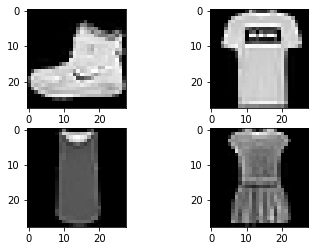

In [3]:
# Plot ad hoc mnist instances
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
# load (downloaded if needed) the fashion_MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [10]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
# build the model
model = baseline_model()

In [12]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.5119 - accuracy: 0.8225 - val_loss: 0.4165 - val_accuracy: 0.8510
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3711 - accuracy: 0.8673 - val_loss: 0.3822 - val_accuracy: 0.8629
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3349 - accuracy: 0.8791 - val_loss: 0.3562 - val_accuracy: 0.8729
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3072 - accuracy: 0.8886 - val_loss: 0.3814 - val_accuracy: 0.8688
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2854 - accuracy: 0.8952 - val_loss: 0.3600 - val_accuracy: 0.8699
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2696 - accuracy: 0.9006 - val_loss: 0.3531 - val_accuracy: 0.8775
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.2543 - accuracy: 0.9065 - val_loss: 0.3211 - val_accuracy: 0.8846
Epoch 

In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 11.74%


Above you can see the base model finished with a **Baseline Error of 11.74%** and the following metrics after 10 epochs:
- Training Loss: 0.2228
- Testing Loss:  0.3298
- Training Accuracy: 91.70%
- Testing Accuracy:  88.26%

Now let's try adding **Regularization** to the model.

### Adding L2 Regularization

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [19]:
# define regularized model
def regularized_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# build the regularized model
model = regularized_model()

In [21]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 3s 10ms/step - loss: 0.7762 - accuracy: 0.8270 - val_loss: 0.5733 - val_accuracy: 0.8490
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 0.4712 - accuracy: 0.8699 - val_loss: 0.4598 - val_accuracy: 0.8605
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3864 - accuracy: 0.8823 - val_loss: 0.4003 - val_accuracy: 0.8734
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3505 - accuracy: 0.8878 - val_loss: 0.3788 - val_accuracy: 0.8756
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3274 - accuracy: 0.8935 - val_loss: 0.3797 - val_accuracy: 0.8748
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3109 - accuracy: 0.8976 - val_loss: 0.3687 - val_accuracy: 0.8796
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.2941 - accuracy: 0.9032 - val_loss: 0.3585 - val_accuracy: 0.8835
Epo

In [22]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 11.38%


Above you can see the **l2 regularized model** finished with a **Baseline Error of 11.38%**, which is slightly less than the baseline error of the base model, and the following metrics after 10 epochs:
- Training Loss: 0.2676
- Testing Loss:  0.3503
- Training Accuracy: 91.23%
- Testing Accuracy:  88.62%

These metrics are pretty similar to that of the baseline model, and if anything actually slightly worse. Let's try to adjust the regularization factor.

In [24]:
# define regularized model
def regularized_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
# build the regularized model
model = regularized_model()

In [26]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 3s 11ms/step - loss: 1.3906 - accuracy: 0.8141 - val_loss: 0.5730 - val_accuracy: 0.8330
Epoch 2/10
300/300 [==============================] - 3s 11ms/step - loss: 0.4743 - accuracy: 0.8582 - val_loss: 0.4844 - val_accuracy: 0.8517
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.4252 - accuracy: 0.8684 - val_loss: 0.4722 - val_accuracy: 0.8488
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3901 - accuracy: 0.8786 - val_loss: 0.4462 - val_accuracy: 0.8562
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3718 - accuracy: 0.8819 - val_loss: 0.4219 - val_accuracy: 0.8661
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3657 - accuracy: 0.8847 - val_loss: 0.4074 - val_accuracy: 0.8673
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3483 - accuracy: 0.8895 - val_loss: 0.4045 - val_accuracy: 0.8720

In [27]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 12.49%


Now the baseline error is even worse.

Above you can see the **l2 regularized model with 0.01 regularization factor** finished with a **Baseline Error of 12.49%**, which is **higher** than the baseline error of the base model, and the following metrics after 10 epochs:
- Training Loss: 0.3157
- Testing Loss:  0.3892
- Training Accuracy: 90.04%
- Testing Accuracy:  87.51%

This model actually performed worse. Let's try decreasing the regularization factor.

In [28]:
# define regularized model
def regularized_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
# build the regularized model
model = regularized_model()

In [30]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 3s 11ms/step - loss: 0.5353 - accuracy: 0.8285 - val_loss: 0.4994 - val_accuracy: 0.8331
Epoch 2/10
300/300 [==============================] - 4s 12ms/step - loss: 0.3912 - accuracy: 0.8724 - val_loss: 0.4279 - val_accuracy: 0.8563
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3468 - accuracy: 0.8849 - val_loss: 0.3850 - val_accuracy: 0.8753
Epoch 4/10
300/300 [==============================] - 4s 12ms/step - loss: 0.3231 - accuracy: 0.8926 - val_loss: 0.3742 - val_accuracy: 0.8742
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.3033 - accuracy: 0.8989 - val_loss: 0.3793 - val_accuracy: 0.8726
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2828 - accuracy: 0.9053 - val_loss: 0.3466 - val_accuracy: 0.8843
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2730 - accuracy: 0.9080 - val_loss: 0.3533 - val_accuracy: 0.8821

In [31]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 10.83%


Above you can see the **l2 regularized model with 0.0001 regularization factor** finished with a **Baseline Error of 10.83%**, which is **lower** than the baseline error of the base model, and the following metrics after 10 epochs:
- Training Loss: 0.2339
- Testing Loss:  0.3313
- Training Accuracy: 92.06%
- Testing Accuracy:  89.17%

This model performed the best of the 3. Decreasing the regularization factor to 0.0001 improved the baseline error (10.83%). Also, all the losses and accuracy have improved. This makes sense, as regularization tends to improve model performance by preventing overfitting.

### Adding Dropout

In [32]:
# define dropout model
def dropout_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
# build the dropout model
model = dropout_model()

In [34]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 7ms/step - loss: 0.5747 - accuracy: 0.7980 - val_loss: 0.4503 - val_accuracy: 0.8372
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4189 - accuracy: 0.8496 - val_loss: 0.4029 - val_accuracy: 0.8536
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3833 - accuracy: 0.8613 - val_loss: 0.3851 - val_accuracy: 0.8625
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3629 - accuracy: 0.8675 - val_loss: 0.3674 - val_accuracy: 0.8681
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3465 - accuracy: 0.8725 - val_loss: 0.3591 - val_accuracy: 0.8740
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3319 - accuracy: 0.8780 - val_loss: 0.3473 - val_accuracy: 0.8733
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3234 - accuracy: 0.8815 - val_loss: 0.3453 - val_accuracy: 0.8773
Epoch 

In [35]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 12.62%


Above you can see the **dropout layer** finished with a **Baseline Error of 12.62%**, which is **higher** than the baseline error of the base model, and the following metrics after 10 epochs:
- Training Loss: 0.2989
- Testing Loss:  0.3395
- Training Accuracy: 88.90%
- Testing Accuracy:  87.38%

This model with a dropout layer performed worse than the base model. Let's try using a different dropout rate.

In [36]:
# define dropout model
def dropout_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
# build the dropout model
model = dropout_model()

In [38]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.5327 - accuracy: 0.8133 - val_loss: 0.4383 - val_accuracy: 0.8424
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3910 - accuracy: 0.8602 - val_loss: 0.3817 - val_accuracy: 0.8652
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3491 - accuracy: 0.8744 - val_loss: 0.3640 - val_accuracy: 0.8695
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3268 - accuracy: 0.8810 - val_loss: 0.3517 - val_accuracy: 0.8748
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3078 - accuracy: 0.8872 - val_loss: 0.3467 - val_accuracy: 0.8763
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.2955 - accuracy: 0.8897 - val_loss: 0.3335 - val_accuracy: 0.8770
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.2842 - accuracy: 0.8946 - val_loss: 0.3301 - val_accuracy: 0.8812
Epoch 

In [39]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 11.87%


Above you can see the **dropout layer with a rate of 0.25** finished with a **Baseline Error of 11.87%**, which is slightly **higher** than the baseline error of the base model but lower than the baseline error of the other dropout model, and the following metrics after 10 epochs:
- Training Loss: 0.2281
- Testing Loss:  0.3262
- Training Accuracy: 90.44%
- Testing Accuracy:  88.13%

Let's try now with a higher dropout rate - 0.75.

In [40]:
# define dropout model
def dropout_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.75))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [41]:
# build the dropout model
model = dropout_model()

In [42]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.6840 - accuracy: 0.7582 - val_loss: 0.4772 - val_accuracy: 0.8317
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4975 - accuracy: 0.8216 - val_loss: 0.4295 - val_accuracy: 0.8439
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4581 - accuracy: 0.8335 - val_loss: 0.4086 - val_accuracy: 0.8517
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4354 - accuracy: 0.8401 - val_loss: 0.3917 - val_accuracy: 0.8570
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4225 - accuracy: 0.8466 - val_loss: 0.3886 - val_accuracy: 0.8588
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4094 - accuracy: 0.8501 - val_loss: 0.3716 - val_accuracy: 0.8652
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4004 - accuracy: 0.8532 - val_loss: 0.3756 - val_accuracy: 0.8644
Epoch 

In [43]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 13.06%


Above you can see the **dropout layer with a rate of 0.75** finished with a **Baseline Error of 13.06%**, which is **higher** than the baseline error of the base model and the other dropout models, and the following metrics after 10 epochs:
- Training Loss: 0.3781
- Testing Loss:  0.3577
- Training Accuracy: 86.19%
- Testing Accuracy:  86.94%

Dropout is similar to regularization in that it tries to simplify and generalize the model by ignoring some of the neurons during the training, which can prevent overfitting. We see here that different droput rates can either benefit or hurt the model performance, so finding the best rate is key.

Finally, let's try combining the best regularized model with the best dropout model.
The best regularized model used l2 regularization with a regularization rate of 0.0001 and the best dropout model had a dropout rate of 0.25.

### Both Regularization and Droput Layers

In [55]:
# define regularized and dropout model
def regularized_dropout_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [56]:
# build the regularized dropout model
model = dropout_model()

In [57]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)

Epoch 1/10
300/300 [==============================] - 2s 6ms/step - loss: 0.6720 - accuracy: 0.7617 - val_loss: 0.4671 - val_accuracy: 0.8293
Epoch 2/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4918 - accuracy: 0.8227 - val_loss: 0.4259 - val_accuracy: 0.8450
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4538 - accuracy: 0.8367 - val_loss: 0.4078 - val_accuracy: 0.8525
Epoch 4/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4340 - accuracy: 0.8425 - val_loss: 0.3940 - val_accuracy: 0.8605
Epoch 5/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4219 - accuracy: 0.8469 - val_loss: 0.3782 - val_accuracy: 0.8619
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4093 - accuracy: 0.8503 - val_loss: 0.3767 - val_accuracy: 0.8648
Epoch 7/10
300/300 [==============================] - 2s 6ms/step - loss: 0.3980 - accuracy: 0.8543 - val_loss: 0.3734 - val_accuracy: 0.8665
Epoch 

In [58]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 12.93%


Above you can see the model actually had a worse **baseline error of 12.93%** and the following metrics after 10 epochs:
- Training Loss: 0.3792
- Testing Loss:  0.3587
- Training Accuracy: 86.04%
- Testing Accuracy:  87.07%

Overall, the changes we made did not heavily impact the model performance, with the baseline errors all being between a range of 10.83% and 13.06%. The best model used the l2 regularizer with a regularization factor of 0.0001. Regularization will help select a midpoint between a model with high bias and a model with high variance. It will make the model simpler and closer to an under-fit linear model. Adjusting the rates and other hyperparameters more can produce an even better model.